In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
train = pd.read_csv('data/train.csv')
train = train.dropna(axis=1, how='all')

test = pd.read_csv('data/test.csv')
test = test.dropna(axis=1, how='all')

data = pd.date_range('10/1/2012', periods=len(train) + len(test), freq='d')

In [32]:
len(data)

531

In [33]:
train["Day"] = data[:len(train)]
test["Day"] = data[len(train):]

In [35]:
train.head()

,sessions,Day
0,500,2012-10-01
1,1339,2012-10-02
2,1462,2012-10-03
3,1702,2012-10-04
4,1656,2012-10-05


In [41]:
total = pd.concat([train, test])
len(total)

531

[]

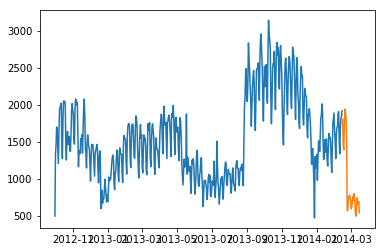

In [48]:
plt.plot(train.Day, train.sessions)
plt.plot()

plt.plot(test.Day, test.sessions)
plt.plot()

[]

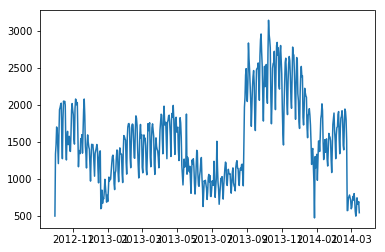

In [47]:
plt.plot(total.Day, total.sessions)
plt.plot()

In [ ]:

total = total[["Day","sessions"]]
total.index = total.Day
total = total.drop('Day', 1)

In [73]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.sessions, autolag='AIC')
    print('dftest')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).std()


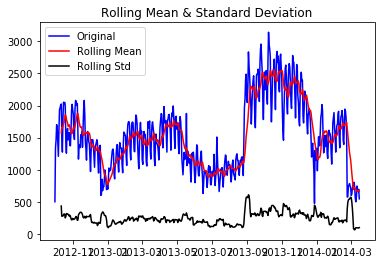

Results of Dickey-Fuller Test:
dftest
Test Statistic                  -1.766357
p-value                          0.397288
#Lags Used                      16.000000
Number of Observations Used    514.000000
Critical Value (1%)             -3.443136
Critical Value (10%)            -2.569774
Critical Value (5%)             -2.867179
dtype: float64


In [74]:

test_stationarity(total)